In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Projet SatMap/Implementation

/content/drive/My Drive/Projet SatMap/Implementation


In [3]:
!pip install tifffile

     |████████████████████████████████| 133kB 1.4MB/s 
     |████████████████████████████████| 18.1MB 187kB/s 


taille de l'image : (3345, 3393)
x_max : 0.009171 | y_min : -0.009042
MULTIPOLYGON (((5.8e-05 -0.009042, 5.4e-05 -0.009039, 5.2e-05 -0.009029000000000001, 5.4e-05 -0.00902, 6.2e-05 -0.009017000000000001, 6.9e-05 -0.009018, 7.6e-05 -0.009018999999999999, 8.500000000000001e-05 -0.009024000000000001, 8.899999999999999e-05 -0.009029000000000001, 9.000000000000001e-05 -0.009039, 8.6e-05 -0.009042, 5.8e-05 -0.009042)), ((0.00019 -0.009042, 0.00019 -0.009037, 0.00019 -0.009036000000000001, 0.000192 -0.009034, 0.000194 -0.009032, 0.000196 -0.00903, 0.000198 -0.00903, 0.000198 -0.009029000000000001, 0.000202 -0.009027, 0.000205 -0.009025999999999999, 0.000208 -0.009025, 0.00021 -0.009023, 0.000219 -0.009022000000000001, 0.00022 -0.009022000000000001, 0.000221 -0.009022000000000001, 0.000226 -0.009022000000000001, 0.000233 -0.009022000000000001, 0.000234 -0.009022000000000001, 0.000236 -0.009022000000000001, 0.000239 -0.009023, 0.000243 -0.009023, 0.000246 -0.009024000000000001, 0.000247 -0.0090

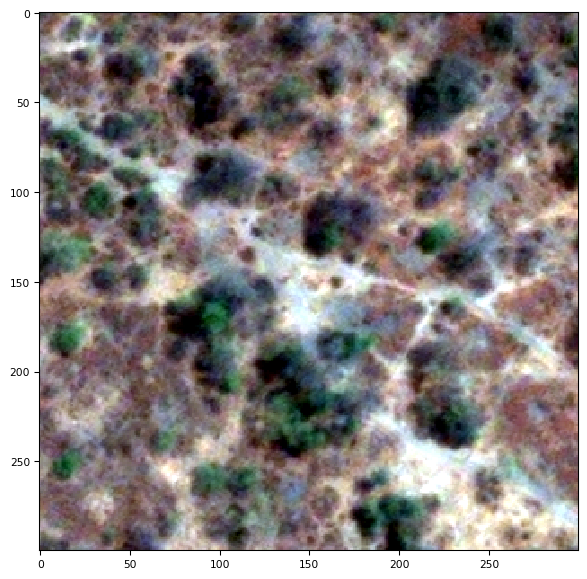

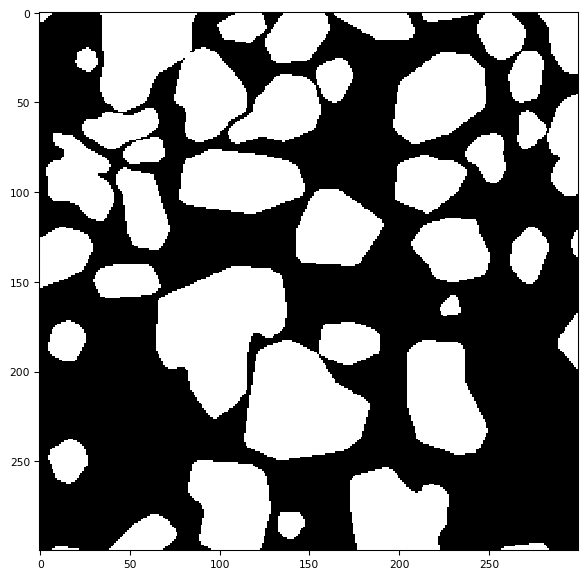

In [5]:
# Test du fichier "treatment.py"

import shapely.affinity
import tifffile as tiff
import matplotlib.pyplot
import csv
import sys

%matplotlib inline

import bin.data_opening as op
import bin.treatment as tr

csv.field_size_limit(sys.maxsize)

# Liste des images annotees
LIST_IMG_ID = ('6010_1_2', '6010_4_2', '6010_4_4', '6040_1_0', '6040_1_3', '6040_2_2', 
         '6040_4_4', '6060_2_3', '6070_2_3', '6090_2_0', '6100_1_3', '6100_2_2',
         '6100_2_3', '6110_1_2', '6110_3_1', '6110_4_0', '6120_2_0', '6120_2_2',
         '6140_1_2', '6140_3_1', '6150_2_3', '6160_2_1', '6170_0_4', '6170_2_4',
         '6170_4_1')

# ID des classes respectives : batiments, routes, arbres, rivieres, lacs 
LIST_POLY_TYPE = ('1', '3', '5', '7', '8')

IMG_ID = LIST_IMG_ID[2]
POLY_TYPE = LIST_POLY_TYPE[2]

# Ouverture des fichiers
data_opening = op.DataOpening()

x_max, y_min = data_opening.get_size(IMG_ID)
train_polygons = data_opening.get_polygons(IMG_ID, POLY_TYPE)
img_rgb, img_size = data_opening.get_tiff(IMG_ID)

# Traitment des fichiers
treatment = tr.Treatment()

x_scaler, y_scaler = treatment.get_scalers(img_size, x_max, y_min)

list_polygons = shapely.affinity.scale(train_polygons, xfact=x_scaler, yfact=y_scaler, origin=(0, 0, 0))

train_mask = treatment.get_mask_polygons(img_size, list_polygons)

# Affichage des images traitees
tiff.imshow(treatment.get_img_rgb(img_rgb[2900:3200,2000:2300]))
tiff.imshow(treatment.get_img_mask(train_mask[2900:3200,2000:2300]))

print("taille de l'image :", img_size)
print("x_max :", x_max, "| y_min :", y_min)
print(train_polygons)

print("")

print("x_scaler :", x_scaler, "| y_scaler :", y_scaler)
